<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/04-Mi-primer-modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi primer modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos simulados. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Los paquetes necesarios son:

In [2]:
# Paquetes necesarios
import numpy as np  # Para generación de datos y operaciones numéricas
import pandas as pd  # Para manejo de datos estructurados
import matplotlib.pyplot as plt  # Para visualización de datos
from sklearn.linear_model import LinearRegression  # Para el modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Para evaluación del modelo
from sklearn.model_selection import train_test_split

---
## <font color='264CC7'> Datos </font>


Utilicemos datos ficticios:

In [69]:
# Datos proporcionados

#x = [5, 7, 8, 9, 2, 17, 3, 10, 4, 11, 12, 16, 6]
#y = [99, 86, 87, 88, 90, 86, 80, 87, 94, 78, 77, 85, 86]


np.random.seed(42)
x = np.random.uniform(0, 20, (100, 1))
y = 3 * x + np.random.uniform(-10, 10, (100, 1))  # La relación lineal es y = 3 * x + ruido

x_flat = x.flatten()
y_flat = y.flatten()

df = pd.DataFrame({
    'x': x_flat,
    'y': y_flat
})

# Mostrar los datos
display(df)

,x,y
0,7.490802,13.100991
1,19.014286,59.771067
2,14.639879,40.206756
3,11.973170,36.090923
4,3.120373,17.512448
...,...,...
95,9.875912,26.611927
96,10.454657,35.883083
97,8.550820,33.594666
98,0.508383,9.266876


Grafiquemos su dispersión:

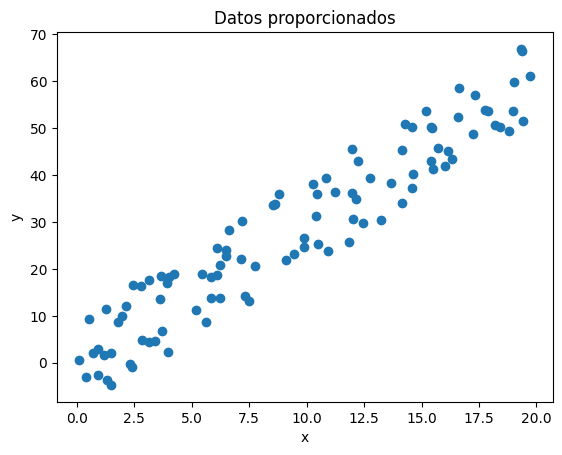

In [70]:
# Gráfico de dispersión de df
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos proporcionados')
plt.show()


---
## <font color='264CC7'> Características y etiquetas </font>

Ahora, separamos las características y las etiquetas.

In [71]:
# Dividir el conjunto de datos en características y etiquetas
features = ['x']
X = df.loc[:, features]
y = df.loc[:, ['y']]

---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Con esto, dividimos los datos en dos conjuntos: uno para entrenamiento y otro para prueba.

In [72]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Ahora, visualizamos el tamaño de los conjuntos de entrenamiento y prueba.

In [73]:
# Reviso las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (80, 1)
y_train: (80, 1)
X_test: (20, 1)
y_test: (20, 1)


---
## <font color='264CC7'> Entrenamiento </font>

Definimos un modelo de regresión lineal y lo entrenamos con los datos de entrenamiento.

In [74]:
# Crear el modelo y ajustarlo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Visualizar los coeficientes
print('Ecuación de la recta:')
print('y =', modelo.coef_[0][0], 'x +', modelo.intercept_[0])


Ecuación de la recta:
y = 3.0004915468200433 x + -0.2545447764577773


Visualizamos el modelo entrenado.

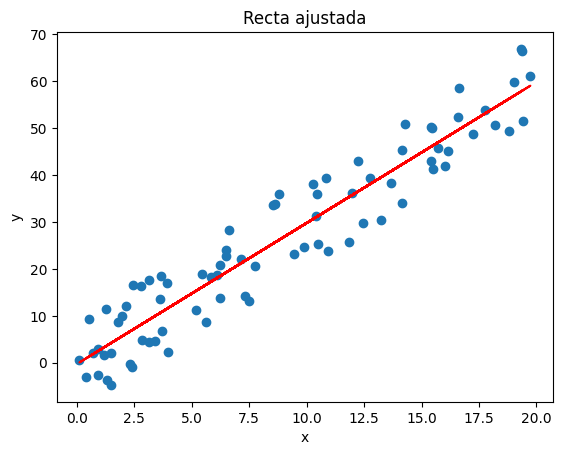

In [75]:
# Graficar la recta
plt.scatter(X_train, y_train)
plt.plot(X, modelo.coef_[0][0] * X + modelo.intercept_[0], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta ajustada')
plt.show()


---
## <font color='264CC7'> Evaluacion </font>

Realizamos predicciones con el conjunto de prueba y evaluamos el modelo.

In [76]:
# Predicciones del modelo
y_pred = modelo.predict(X_test)

# Comparar las predicciones con los datos de prueba
df_predicciones = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicción': y_pred.flatten()
})
display(df_predicciones)

,Actual,Predicción
0,18.340722,11.727845
1,50.120815,43.528999
2,40.206756,43.672288
3,50.153560,55.066972
4,37.227759,43.493052
5,36.338661,33.427605
6,24.327976,18.002981
7,43.457601,48.681158
8,45.587008,35.625332
9,26.611927,29.378045


Veamos en un gráfico cómo se comparan las predicciones con las etiquetas reales.

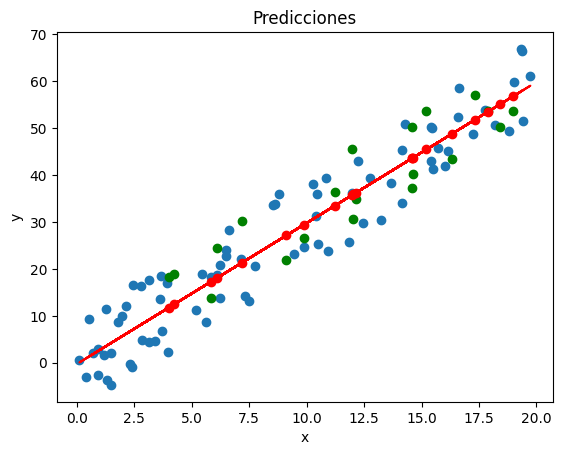

In [77]:
# Graficar las predicciones
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='g')
plt.scatter(X_test, y_pred, color='r')
plt.plot(X, modelo.coef_[0][0] * X + modelo.intercept_[0], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicciones')
plt.show()


Calculamos el error cuadrático medio.

In [78]:
# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)

print('Error cuadrático medio:', mse)

Error cuadrático medio: 32.00902034066053


In [79]:
# Calcular el R^2
r2 = r2_score(y_test, y_pred)

# Mostrar el R^2
print(f'R^2: {r2}')

R^2: 0.8170137989905069
